In [2]:
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection

(123, 219) (246, 438)


C:\Users\caleb\AppData\Local\Temp\ipykernel_13012\3631418977.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq))).astype(int), cmap='jet')
C:\Users\caleb\AppData\Local\Temp\ipykernel_13012\3631418977.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq_kernel))).astype(int), cmap='jet')
C:\Users\caleb\AppData\Local\Temp\ipykernel_13012\3631418977.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq_im2))).astype(int), cmap='jet')
C:\Users\caleb\AppData\Local\Temp\ipykernel_13012\3631418977.py:47: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(im2.astype(np.uint8)) # the imaginary part is an artifact


Text(0.5, 1.0, 'Output Image')

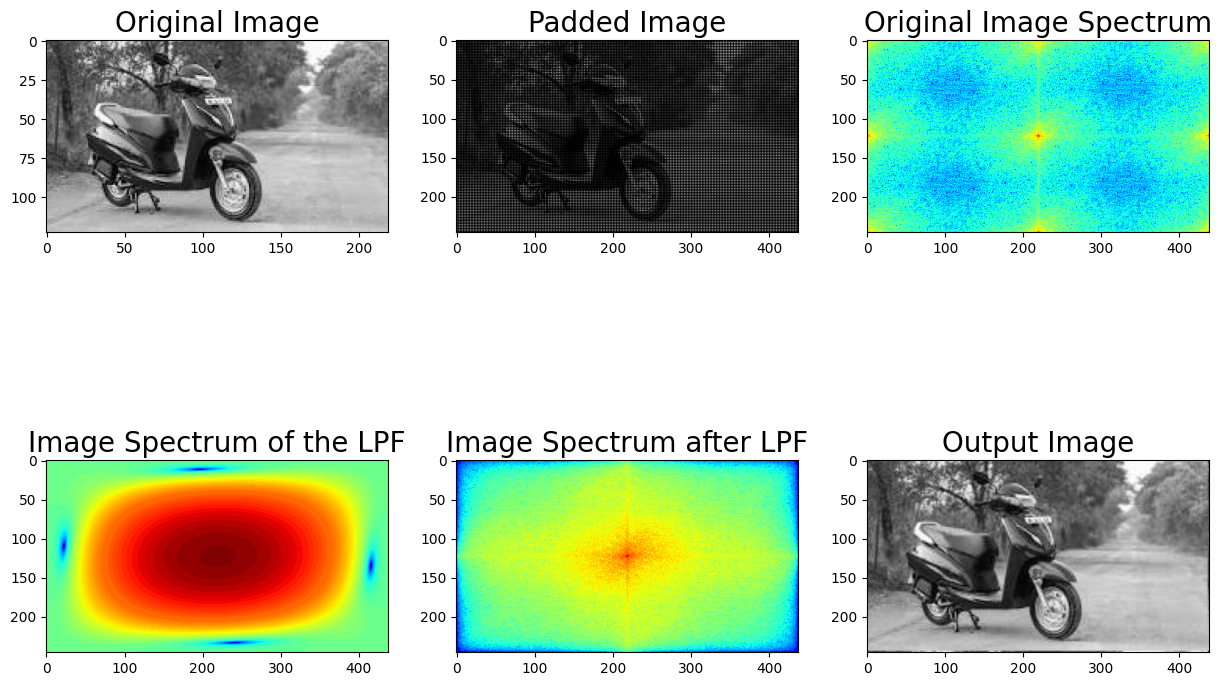

In [3]:

import numpy as np
import numpy.fft as fp
import matplotlib.pyplot as plt
 
im = np.mean(imread('D:\\MULANGA\\myproject\\photos\\image1.png'), axis=2)
im1 = np.zeros((2*im.shape[0], 2*im.shape[1]))
print(im.shape, im1.shape)
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        im1[2*i,2*j] = im[i,j]
 
def padwithzeros(vector, pad_width, iaxis, kwargs):
    vector[:pad_width[0]] = 0
    vector[-pad_width[1]:] = 0
    return vector
 

kernel = [[0.25, 0.5, 0.25], [0.5, 1, 0.5], [0.25, 0.5, 0.25]]

kernel = np.pad(kernel, (((im1.shape[0]-3)//2,(im1.shape[0]-3)//2+1), ((im1.shape[1]-3)//2,(im1.shape[1]-3)//2+1)), padwithzeros)
 
plt.figure(figsize=(15,10))
plt.gray()
 
freq = fp.fft2(im1)
freq_kernel = fp.fft2(fp.ifftshift(kernel))
freq_LPF = freq*freq_kernel 
im2 = fp.ifft2(freq_LPF)
freq_im2 = fp.fft2(im2)
 
plt.subplot(2,3,1)
plt.imshow(im)
plt.title('Original Image', size=20)
plt.subplot(2,3,2)
plt.imshow(im1)
plt.title('Padded Image', size=20)
plt.subplot(2,3,3)
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq))).astype(int), cmap='jet')
plt.title('Original Image Spectrum', size=20)
plt.subplot(2,3,4)
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq_kernel))).astype(int), cmap='jet')
plt.title('Image Spectrum of the LPF', size=20)
plt.subplot(2,3,5)
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq_im2))).astype(int), cmap='jet')
plt.title('Image Spectrum after LPF', size=20)
plt.subplot(2,3,6)
plt.imshow(im2.astype(np.uint8)) 
plt.title('Output Image', size=20)